<img src="../images/logos/openradar_logo.svg" width=300 alt="Python-Jlab-logo"></img>

# Py-Art, Xradar y Wradlib

---

## Introducción
En este cuadernillo (Notebook) aprenderemos los conceptos básicos para trabajar con datos provenientes de radares meteorológicos:

1. Breve introducción a Py-Art
1. Breve introducción a Xradar
2. Breve introducción a Wradlib

## Prerequisitos
| Conceptos | Importancia | Notas |
| --- | --- | --- |
| [Introducción a Numpy](https://foundations.projectpythia.org/core/numpy.html) | Necesario | Información complementaria |
| [Introducción a Xarray](https://foundations.projectpythia.org/core/xarray.html) | Necesario | Información complementaria |
| [Matplotlib](https://foundations.projectpythia.org/core/matplotlib.html) | Necesario |  Generación de gráficas|
| [Cartopy](https://foundations.projectpythia.org/core/cartopy/cartopy.html) | Necesario |  Generación de mapas|
| [Radar Cookbook](https://projectpythia.org/radar-cookbook/README.html) | Necesario | Información complementaria |

- **Tiempo de aprendizaje**: 30 minutos

### Librerias

In [1]:
import numpy as np
import pyart
import xradar as xd
import wradlib as wrl
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cmweather


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



---

## 1. `Py-Art`

* [`Py-ART`](https://arm-doe.github.io/pyart/index.html) es una libreria en Python que nos permite **graficar**, **corregir** y **analizar** datos de **radares meteorológicos** de diferentes **fabricantes**, **tipo**, y **modos de operación**. El software ha sido lanzado en `GitHub` como software de **código abierto bajo** una licencia **BSD**. Se ejecuta en `Linux`, `OS` y `Windows`. 

### 1.1 Lectura de datos usando `Py-Art`

Para leer nuestros datos de radar -en el caso particular de este taller datos provenientes de radares meteorológicos con formato SIGMET- podemos usar el módulo [`pyart.io.read_sigmet`](https://arm-doe.github.io/pyart/API/generated/pyart.io.read_sigmet.html). Sin embaro, `Py-Art` tiene un módulo [`I/O`](https://arm-doe.github.io/pyart/API/generated/pyart.io.html) mucho mas amplio donde se puede leer datos de otros fuentes o tipos de radares  

In [2]:
radar_pa = pyart.io.read_sigmet(f'../data/CAR220809191504.RAWDSX2')

Ahora podemos consultar la informacion contenida dentro del objeto radar usando `rada.info('compact')`

In [3]:
radar_pa.info('compact')

altitude: <ndarray of type: float64 and shape: (1,)>
altitude_agl: None
antenna_transition: None
azimuth: <ndarray of type: float32 and shape: (720,)>
elevation: <ndarray of type: float32 and shape: (720,)>
fields:
	total_power: <ndarray of type: float32 and shape: (720, 994)>
	reflectivity: <ndarray of type: float32 and shape: (720, 994)>
	velocity: <ndarray of type: float32 and shape: (720, 994)>
	spectrum_width: <ndarray of type: float32 and shape: (720, 994)>
	differential_reflectivity: <ndarray of type: float32 and shape: (720, 994)>
	specific_differential_phase: <ndarray of type: float32 and shape: (720, 994)>
	differential_phase: <ndarray of type: float32 and shape: (720, 994)>
	normalized_coherent_power: <ndarray of type: float32 and shape: (720, 994)>
	cross_correlation_ratio: <ndarray of type: float32 and shape: (720, 994)>
	radar_echo_classification: <ndarray of type: float32 and shape: (720, 994)>
fixed_angle: <ndarray of type: float32 and shape: (1,)>
instrument_parameters

Podemos listar las **variables polarimétricas** contenidas en este archivo usando `radar.fields`

In [4]:
list(radar_pa.fields)

['total_power',
 'reflectivity',
 'velocity',
 'spectrum_width',
 'differential_reflectivity',
 'specific_differential_phase',
 'differential_phase',
 'normalized_coherent_power',
 'cross_correlation_ratio',
 'radar_echo_classification']

La variable polarimétrica más popular en es el **factor de reflectividad (Z)** que es una medida indirecta de la intensidad y el tamaño de las gotas de lluvia. Podemos ver mas información en el objeto radar usando la notacion de `diccionarios` en `Python`

In [5]:
radar_pa.fields['reflectivity']

{'units': 'dBZ',
 'standard_name': 'equivalent_reflectivity_factor',
 'long_name': 'Reflectivity',
 'coordinates': 'elevation azimuth range',
 'data': masked_array(
   data=[[18.5, 20.5, 22.5, ..., --, --, --],
         [26.0, 28.0, 29.0, ..., --, --, --],
         [24.0, 25.5, 26.5, ..., --, --, --],
         ...,
         [25.0, 28.0, 30.0, ..., --, --, --],
         [27.5, 30.0, 31.5, ..., --, --, --],
         [26.0, 27.5, 28.5, ..., --, --, --]],
   mask=[[False, False, False, ...,  True,  True,  True],
         [False, False, False, ...,  True,  True,  True],
         [False, False, False, ...,  True,  True,  True],
         ...,
         [False, False, False, ...,  True,  True,  True],
         [False, False, False, ...,  True,  True,  True],
         [False, False, False, ...,  True,  True,  True]],
   fill_value=1e+20,
   dtype=float32),
 '_FillValue': -9999.0}

### 1.2 Gráficas de reflectividad ($Z$)

Ahora podemos generar salidas gráficas usando el módulo [`pyart.graph`](https://arm-doe.github.io/pyart-docs-travis/API/generated/pyart.graph.html?highlight=graph#module-pyart.graph). Esta libreria nos permite realizar gráficos con o sin georeferenciacion usando [`pyart.graph.RadarDisplay`](https://arm-doe.github.io/pyart-docs-travis/API/generated/pyart.graph.RadarDisplay.html#pyart.graph.RadarDisplay) o [`pyart.graph.RadarMapDisplay`](https://arm-doe.github.io/pyart-docs-travis/API/generated/pyart.graph.RadarMapDisplay.html#pyart.graph.RadarMapDisplay)

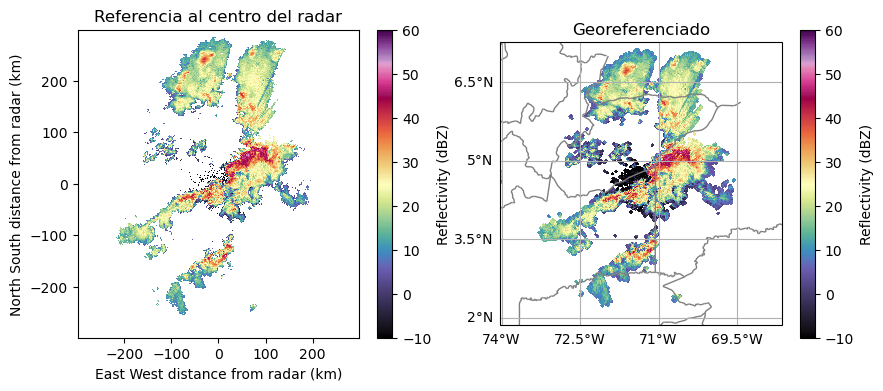

In [6]:
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(121)
display_ = pyart.graph.RadarDisplay(radar_pa)
display_.plot(
            "reflectivity",
            0,
            ax=ax,
            colorbar_label="Reflectivity (dBZ)",
            cmap='ChaseSpectral',
            vmin=-10, vmax=60,
            title="Referencia al centro del radar",
        )

projection = ccrs.PlateCarree()
ax1 = plt.subplot(122, projection=projection)
display_ = pyart.graph.RadarMapDisplay(radar_pa)
# Extract the latitude and longitude of the radar and use it for the center of the map
lat_center = round(radar_pa.latitude['data'][0], 0)
lon_center = round(radar_pa.longitude['data'][0], 0)


# Determine the ticks
lat_ticks = np.arange(lat_center-3, lat_center+3, 1.5)
lon_ticks = np.arange(lon_center-3, lon_center+3, 1.5)

# Set the projection - in this case, we use a general PlateCarree projection

display_.plot_ppi_map("reflectivity", 0, 
                     resolution='10m', 
                     ax=ax1, 
                     lat_lines=lat_ticks, 
                     lon_lines=lon_ticks, 
                     colorbar_label="Reflectivity (dBZ)",
                     cmap='ChaseSpectral',
                      vmin=-10, vmax=60,
                     title="Georeferenciado",)

### 1.3 Gráficas de variables polarimétricas

Tambien podemos generar gráficas de otras variables como reflectividad diferencial ($Z_{DR}$), diferencial de fase ($\phi_{DP}$)

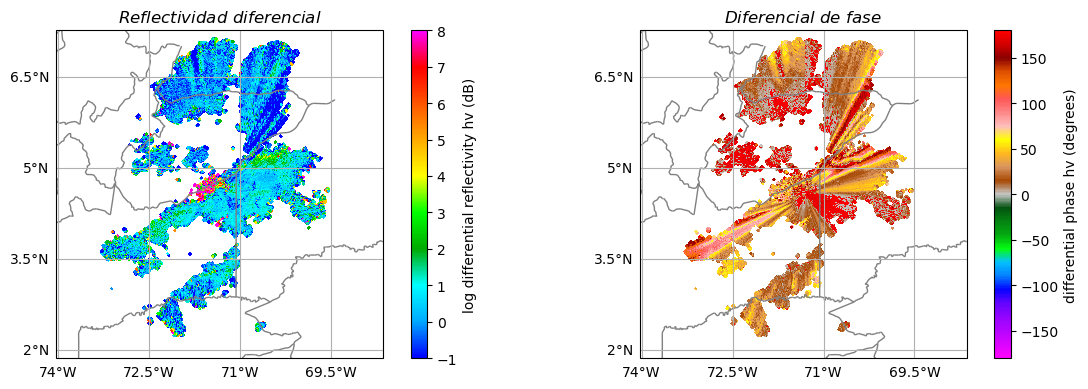

In [7]:
fig = plt.figure(figsize=(12,4))
display_ = pyart.graph.RadarMapDisplay(radar_pa)

ax2 = plt.subplot(121, projection=projection)
display_.plot_ppi_map("differential_reflectivity", 0, 
                     resolution='10m', 
                     ax=ax2, 
                     lat_lines=lat_ticks, 
                     lon_lines=lon_ticks, 
                     title="$Reflectividad \  diferencial$")

ax3 = plt.subplot(122, projection=projection)
display_.plot_ppi_map("differential_phase", 0, 
                     ax=ax3, resolution='10m', 
                     lat_lines=lat_ticks, 
                     lon_lines=lon_ticks, 
                     title="$Diferencial \ de \ fase$")

plt.tight_layout()

### 1.4 Otras funcionaldiades de Py-Art

Para más funcionalidades de `Py-Art` puedes revisar la [documentación oficial](https://arm-doe.github.io/pyart/) o el [Radar Cookbook](https://projectpythia.org/radar-cookbook/README.html) donde podras encontrar ejemplos y casos de uso.

## 2. `Xradar`

[`Xradar`](https://docs.openradarscience.org/projects/xradar/en/stable/), de acuerdo con la dumentación oficial, "es una herramienta que nos permite incorporar los datos de **radar meteorológico** al modelo de datos `Xarray`". Básicamente, esta herramienta nos permite acceder a nuestros datos de radar usando las ventajas de `etiquetas`, `coordenadas`, y `atributos`. `Xradar` es una herramienta de **código abierto** que se basa en la colaboración de la comunidad científica y sus aportes a la misma. Se encuentra en un **estado estable** y en constante desarrollo. 

### 2.1  Lectura de datos usando `Xradar`

Al igual que `Py-Art`, esta libreria tiene un módulo [`I/O`](https://docs.openradarscience.org/projects/xradar/en/stable/importers.html) que soporta datos de radares de multiples fuentes/formatos. Para nuestro caso particular, utilizaremos el método [`xd.io.open_iris_datatree`](https://docs.openradarscience.org/projects/xradar/en/latest/notebooks/Iris.html#) para leer nuestros datos en formato SIGMET.

In [8]:
radar_xd = xd.io.open_iris_datatree(f'../data/CAR220809191504.RAWDSX2')
display(radar_xd)

DataTree('root', parent=None)
│   Dimensions:              ()
│   Data variables:
│       volume_number        int64 0
│       platform_type        <U5 'fixed'
│       instrument_type      <U5 'radar'
│       time_coverage_start  <U20 '2022-08-09T19:15:05Z'
│       time_coverage_end    <U20 '2022-08-09T19:16:21Z'
│       longitude            float64 -71.33
│       altitude             float64 206.0
│       sweep_mode           <U20 'azimuth_surveillance'
│       latitude             float64 4.564
│   Attributes:
│       Conventions:      None
│       version:          None
│       title:            None
│       institution:      None
│       references:       None
│       source:           None
│       history:          None
│       comment:          im/exported using xradar
│       instrument_name:  None
└── DataTree('sweep_0')
        Dimensions:            (azimuth: 720, range: 994)
        Coordinates:
            elevation          (azimuth) float32 ...
            time               (azimuth) datetime64[ns] 2022-08-09T19:15:56.891000 .....
          * range              (range) float32 1e+03 1.3e+03 ... 2.986e+05 2.989e+05
            longitude          float64 ...
            latitude           float64 ...
            altitude           float64 ...
            sweep_mode         <U20 ...
          * azimuth            (azimuth) float32 0.03571 0.5795 1.019 ... 359.0 359.6
        Data variables: (12/16)
            DBTH               (azimuth, range) float32 ...
            DBZH               (azimuth, range) float32 ...
            VRADH              (azimuth, range) float32 ...
            WRADH              (azimuth, range) float32 ...
            ZDR                (azimuth, range) float32 ...
            KDP                (azimuth, range) float32 ...
            ...                 ...
            DB_DBTE8           (azimuth, range) float32 ...
            DB_DBZE8           (azimuth, range) float32 ...
            sweep_number       int64 ...
            prt_mode           <U7 ...
            follow_mode        <U7 ...
            sweep_fixed_angle  float64 ...

Como podemos observar nuestro objeto radar tiene una estructura de un [`xarray.datatree`](https://xarray-datatree.readthedocs.io/en/latest/data-structures.html) lo que nos permite tener multiples elevaciones en un solo objeto.
Para acceder a nuestro `Dataset` podemos usar la notación de `diccionarios` de `Python` seguido por el método `.ds`

In [9]:
display(radar_xd['sweep_0'].ds)

<xarray.DatasetView>
Dimensions:            (azimuth: 720, range: 994)
Coordinates:
    elevation          (azimuth) float32 ...
    time               (azimuth) datetime64[ns] 2022-08-09T19:15:56.891000 .....
  * range              (range) float32 1e+03 1.3e+03 ... 2.986e+05 2.989e+05
    longitude          float64 ...
    latitude           float64 ...
    altitude           float64 ...
    sweep_mode         <U20 ...
  * azimuth            (azimuth) float32 0.03571 0.5795 1.019 ... 359.0 359.6
Data variables: (12/16)
    DBTH               (azimuth, range) float32 ...
    DBZH               (azimuth, range) float32 ...
    VRADH              (azimuth, range) float32 ...
    WRADH              (azimuth, range) float32 ...
    ZDR                (azimuth, range) float32 ...
    KDP                (azimuth, range) float32 ...
    ...                 ...
    DB_DBTE8           (azimuth, range) float32 ...
    DB_DBZE8           (azimuth, range) float32 ...
    sweep_number       int64 ...
    prt_mode           <U7 ...
    follow_mode        <U7 ...
    sweep_fixed_angle  float64 ...

### 2.2 Gráfico de reflectividad (Z)

Como ya conocemos, `Xarray` nos permite generar gráficos de manera rápida sin tener que utilizar la libreria `matplotlib` usando el método `.plot`

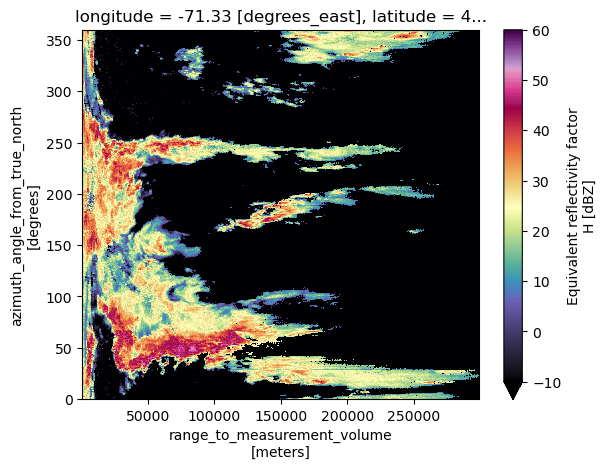

In [10]:
radar_xd['sweep_0']['DBZH'].plot(cmap='ChaseSpectral', vmin=-10, vmax=60)

Nuestro `Dataset` tiene por `coordenadas` y `dimensiones` el **azimuth** y el **rango**. Debemos georeferenciar nuestro `Dataset` para visualizar los datos en cordenadas relativas al radar o geográficas. Para lograr esto usamos el método [`xr.georeference`](https://docs.openradarscience.org/projects/xradar/en/stable/georeference.html)

In [11]:
radar = radar_xd.xradar.georeference()
display(radar['sweep_0'])

DataTree('sweep_0', parent="root")
    Dimensions:            (azimuth: 720, range: 994)
    Coordinates:
        elevation          (azimuth) float64 0.4779 0.4779 0.4779 ... 0.4779 0.4779
        time               (azimuth) datetime64[ns] 2022-08-09T19:15:56.891000 .....
      * range              (range) float32 1e+03 1.3e+03 ... 2.986e+05 2.989e+05
        longitude          float64 -71.33
        latitude           float64 4.564
        altitude           float64 206.0
        sweep_mode         <U20 ...
      * azimuth            (azimuth) float32 0.03571 0.5795 1.019 ... 359.0 359.6
        crs_wkt            int64 0
        x                  (azimuth, range) float64 0.6231 0.8101 ... -2.191e+03
        y                  (azimuth, range) float64 999.9 1.3e+03 ... 2.987e+05
        z                  (azimuth, range) float64 214.4 216.9 ... 7.948e+03
    Data variables: (12/16)
        DBTH               (azimuth, range) float32 ...
        DBZH               (azimuth, range) float32 ...
        VRADH              (azimuth, range) float32 ...
        WRADH              (azimuth, range) float32 ...
        ZDR                (azimuth, range) float32 ...
        KDP                (azimuth, range) float32 ...
        ...                 ...
        DB_DBTE8           (azimuth, range) float32 ...
        DB_DBZE8           (azimuth, range) float32 ...
        sweep_number       int64 ...
        prt_mode           <U7 ...
        follow_mode        <U7 ...
        sweep_fixed_angle  float64 ...

Como se puede observar, **x**, **y** y **z** han sido agregados como `coordenadas` a nuestro `Dataset`. 

In [12]:
radar_xd['sweep_0'].x

<xarray.DataArray 'x' (azimuth: 720, range: 994)>
array([[ 6.23142271e-01,  8.10084711e-01,  9.97027039e-01, ...,
         1.85753047e+02,  1.85939651e+02,  1.86126254e+02],
       [ 1.01139065e+01,  1.31480746e+01,  1.61822408e+01, ...,
         3.01486360e+03,  3.01789227e+03,  3.02092094e+03],
       [ 1.77825861e+01,  2.31173550e+01,  2.84521208e+01, ...,
         5.30082727e+03,  5.30615238e+03,  5.31147746e+03],
       ...,
       [-2.48752213e+01, -3.23377781e+01, -3.98003304e+01, ...,
        -7.41507736e+03, -7.42252640e+03, -7.42997541e+03],
       [-1.69676737e+01, -2.20579693e+01, -2.71482618e+01, ...,
        -5.05790930e+03, -5.06299037e+03, -5.06807143e+03],
       [-7.33402886e+00, -9.53423469e+00, -1.17344392e+01, ...,
        -2.18620734e+03, -2.18840356e+03, -2.19059977e+03]])
Coordinates:
    elevation   (azimuth) float64 0.4779 0.4779 0.4779 ... 0.4779 0.4779 0.4779
    time        (azimuth) datetime64[ns] 2022-08-09T19:15:56.891000 ... 2022-...
  * range       (range) float32 1e+03 1.3e+03 1.6e+03 ... 2.986e+05 2.989e+05
    longitude   float64 -71.33
    latitude    float64 4.564
    altitude    float64 206.0
    sweep_mode  <U20 ...
  * azimuth     (azimuth) float32 0.03571 0.5795 1.019 ... 358.6 359.0 359.6
    crs_wkt     int64 0
    x           (azimuth, range) float64 0.6231 0.8101 ... -2.188e+03 -2.191e+03
    y           (azimuth, range) float64 999.9 1.3e+03 ... 2.984e+05 2.987e+05
    z           (azimuth, range) float64 214.4 216.9 ... 7.935e+03 7.948e+03
Attributes:
    standard_name:  east_west_distance_from_radar
    units:          meters

Nuevamente generemos el gráfico de reflectividad pero ahora utilizando las nuevas `coordenadas`

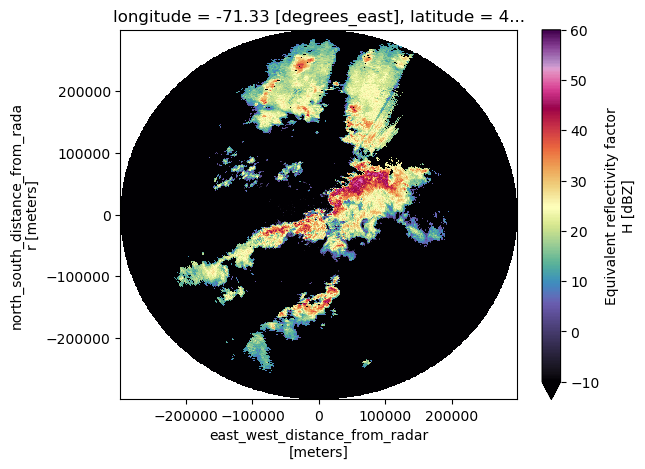

In [13]:
radar_xd['sweep_0']['DBZH'].plot(x='x', y='y', cmap='ChaseSpectral', vmin=-10, vmax=60)

### 2.3 Selección de datos (Slicing)

Como mencionamos en el tutorial de `Xarray`, podemos utilizar las coordenadas y los atributos para seleccionar datos a lo largo de las dimensiones. Seleccionemos datos de reflecividad entre  `40° < azimuth < 120°` y `0 < rango < 150km`

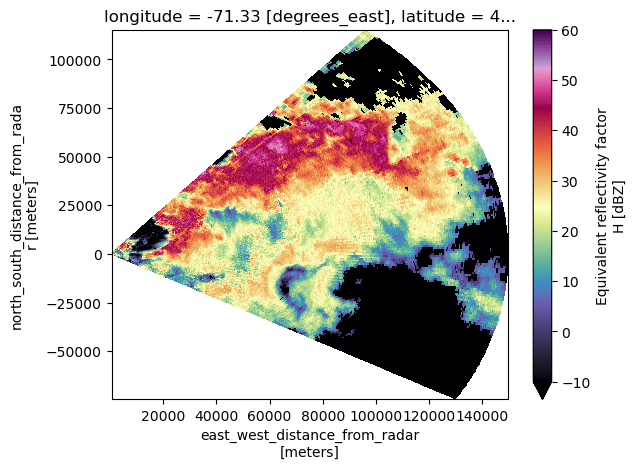

In [14]:
radar_xd['sweep_0']['DBZH'].sel(azimuth=slice(40, 120), range=slice(0, 150*1e3)).plot(x='x', y='y', cmap='ChaseSpectral', vmin=-10, vmax=60)

También podemos visualizar la reflectividad en función del rango. Intentemoslo para `azimuth=55`

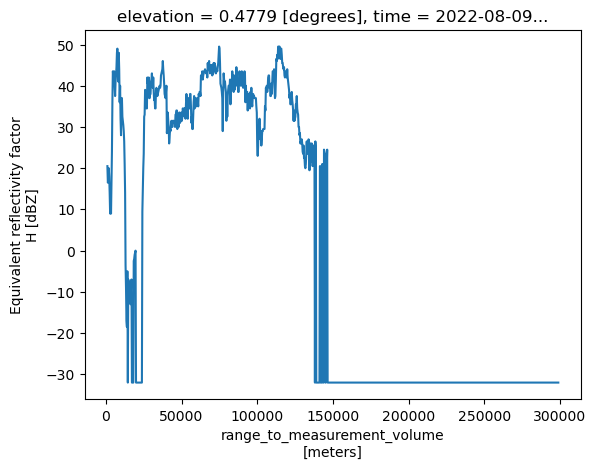

In [15]:
radar_xd['sweep_0']['DBZH'].sel(azimuth=55, method='nearest').plot()

### 2.4 Acceso a otras variables plorimétricas

Podemos acceder a las `variables` dentro del `Dataset` usando la notacion de diccionarios de `Python` o usando el método `Punto`. Tratemos de acceder a la **reflectividad diferencial** $Z_{DR}$

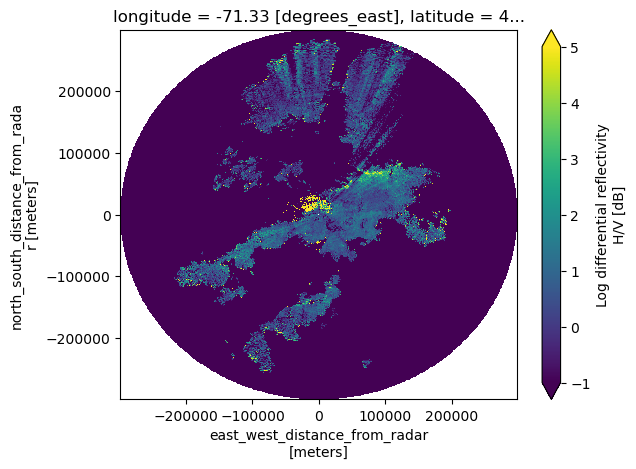

In [16]:
radar_xd['sweep_0']['ZDR'].plot(x='x', y='y', vmin=-1, vmax=5)

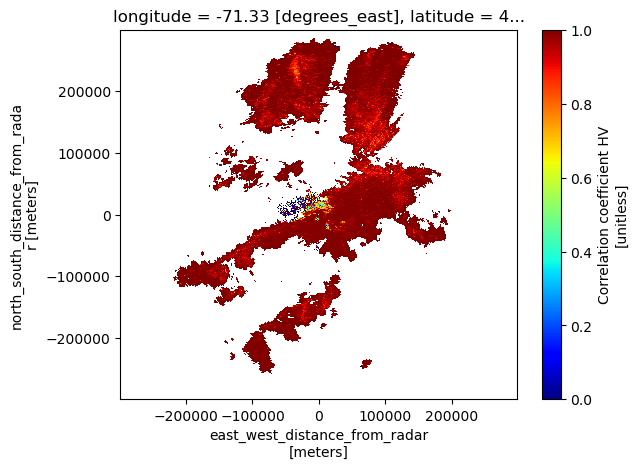

In [17]:
radar_xd['sweep_0'].RHOHV.plot(x='x', y='y', vmin=0, vmax=1, cmap='jet')

En general, `Xradar` es una libreria relativamente "nueva" que sigue en constante evolición y construcción por parte de la comunidad científica. Para más información pueden consultar la [`documentación oficial`](https://docs.openradarscience.org/projects/xradar/en/stable/index.html)

## 3. `Wradlib`

[`Wradlib`](https://docs.wradlib.org/en/latest/) es una libreria, que al igual que las anteriores, nos permite acceder a datos de radares meteorológicos de diversas fuentes y formatos. De acuerdo con la documentación oficial  "`Wradlib` está diseñado para ayudar en los pasos más importantes del procesamiento de datos del radar meteorológico. Estos pueden incluir: leer formatos de datos comunes, georreferenciación, convertir la reflectividad en intensidad de lluvia, identificar y corregir fuentes de error típicas (como el desorden o la atenuación) y visualizar los datos"


### 3.1 Lectura de datos

`Wradlib` ofrece un módulo [`I/O`](https://docs.wradlib.org/en/stable/io.html)completo para la lectura de archivos de radar en diferentes formatos y plataformas. En nuestro caso, utilizaremos `wr.io.read_iris` para leer nuestro archivo SIGMET

In [18]:
radar_wrl = wrl.io.read_iris(f'../data/CAR220809191504.RAWDSX2')

In [19]:
radar_wrl.keys()

odict_keys(['product_hdr', 'product_type', 'ingest_header', 'nsweeps', 'nrays', 'nbins', 'data_types', 'data', 'raw_product_bhdrs'])

El objeto retornado es un  [`OrderedDict`](https://docs.python.org/3/library/collections.html#collections.OrderedDict), que simplemente es un `diccionario` con unos métodos adicionales a los diccionarios normales de Python. Podemos acceder a las variables polarimétricas del radar de la siguiente manera

In [20]:
for variable in radar_wrl["data"][1]["ingest_data_hdrs"].keys():
    print(variable)

DB_DBT
DB_DBZ
DB_VEL
DB_WIDTH
DB_ZDR
DB_KDP
DB_PHIDP
DB_SQI
DB_RHOHV
DB_HCLASS
DB_DBTE8
DB_DBZE8


Si queremos acceder a la reflectividad debemos usar la llave `DB_DBZ`

In [21]:
radar_wrl["data"][1]["sweep_data"]["DB_DBZ"]

array([[ 18.5,  20.5,  22.5, ..., -32. , -32. , -32. ],
       [ 26. ,  28. ,  29. , ..., -32. , -32. , -32. ],
       [ 24. ,  25.5,  26.5, ..., -32. , -32. , -32. ],
       ...,
       [ 25. ,  28. ,  30. , ..., -32. , -32. , -32. ],
       [ 27.5,  30. ,  31.5, ..., -32. , -32. , -32. ],
       [ 26. ,  27.5,  28.5, ..., -32. , -32. , -32. ]])

Puede ser un poco confuso el acceso a los datos usando `Wralib`. Por lo tanto podemos usar la libreria `Xradar` para acceder a los datos y utilizar los métodos de `Wradlib`. En el siguiente ejemplo accedemos al `sweep_0`, luego asignamos `coordenadas` y `georeferencia`

In [22]:
swp = radar_xd["sweep_0"].ds.copy()
swp

<xarray.Dataset>
Dimensions:            (azimuth: 720, range: 994)
Coordinates:
    elevation          (azimuth) float64 0.4779 0.4779 0.4779 ... 0.4779 0.4779
    time               (azimuth) datetime64[ns] 2022-08-09T19:15:56.891000 .....
  * range              (range) float32 1e+03 1.3e+03 ... 2.986e+05 2.989e+05
    longitude          float64 -71.33
    latitude           float64 4.564
    altitude           float64 206.0
    sweep_mode         <U20 ...
  * azimuth            (azimuth) float32 0.03571 0.5795 1.019 ... 359.0 359.6
    crs_wkt            int64 0
    x                  (azimuth, range) float64 0.6231 0.8101 ... -2.191e+03
    y                  (azimuth, range) float64 999.9 1.3e+03 ... 2.987e+05
    z                  (azimuth, range) float64 214.4 216.9 ... 7.948e+03
Data variables: (12/16)
    DBTH               (azimuth, range) float32 ...
    DBZH               (azimuth, range) float32 ...
    VRADH              (azimuth, range) float32 ...
    WRADH              (azimuth, range) float32 ...
    ZDR                (azimuth, range) float32 ...
    KDP                (azimuth, range) float32 ...
    ...                 ...
    DB_DBTE8           (azimuth, range) float32 ...
    DB_DBZE8           (azimuth, range) float32 ...
    sweep_number       int64 ...
    prt_mode           <U7 ...
    follow_mode        <U7 ...
    sweep_fixed_angle  float64 ...

In [23]:
swp = swp.assign_coords(sweep_mode=swp.sweep_mode)
swp = swp.wrl.georef.georeference()

In [24]:
swp

<xarray.Dataset>
Dimensions:            (azimuth: 720, range: 994)
Coordinates: (12/15)
    elevation          (azimuth) float64 0.4779 0.4779 0.4779 ... 0.4779 0.4779
    time               (azimuth) datetime64[ns] 2022-08-09T19:15:56.891000 .....
  * range              (range) float32 1e+03 1.3e+03 ... 2.986e+05 2.989e+05
    longitude          float64 -71.33
    latitude           float64 4.564
    altitude           float64 206.0
    ...                 ...
    x                  (azimuth, range) float64 0.6231 0.8101 ... -2.191e+03
    y                  (azimuth, range) float64 999.9 1.3e+03 ... 2.987e+05
    z                  (azimuth, range) float64 214.1 216.6 ... 7.948e+03
    gr                 (azimuth, range) float64 999.9 1.3e+03 ... 2.987e+05
    rays               (azimuth, range) float32 0.03571 0.03571 ... 359.6 359.6
    bins               (azimuth, range) float32 1e+03 1.3e+03 ... 2.989e+05
Data variables: (12/16)
    DBTH               (azimuth, range) float32 ...
    DBZH               (azimuth, range) float32 ...
    VRADH              (azimuth, range) float32 ...
    WRADH              (azimuth, range) float32 ...
    ZDR                (azimuth, range) float32 ...
    KDP                (azimuth, range) float32 ...
    ...                 ...
    DB_DBTE8           (azimuth, range) float32 ...
    DB_DBZE8           (azimuth, range) float32 ...
    sweep_number       int64 ...
    prt_mode           <U7 ...
    follow_mode        <U7 ...
    sweep_fixed_angle  float64 ...

### 3.2 Gráficos usando `wrl.vis` 

Finalmente podemos generar el gráfico de reflectividad (Z) usando el módulo de visualización `wrl.vis.plot`

<Figure size 500x500 with 0 Axes>

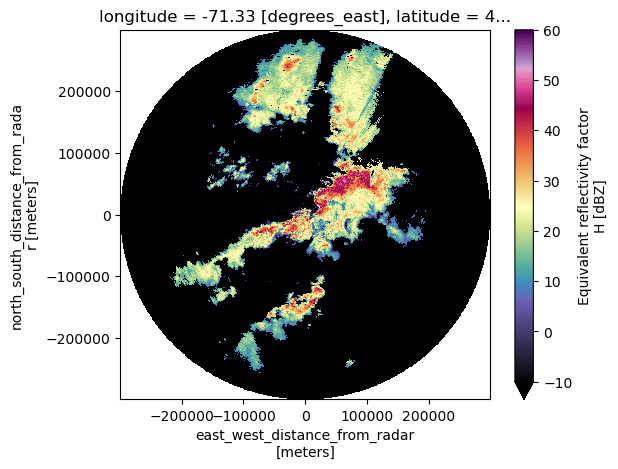

In [25]:
fig = plt.figure(figsize=(5, 5))
pm = swp.DBZH.wrl.vis.plot(vmin=-10, vmax=60, cmap='ChaseSpectral')

Podemos agregar georeferenciacion a nuestro `Dataset` usando el método `wrl.georef.epsg_to_osr`. Para nuestro caso utilizaremos `epsg:4326` o tambien llamado [`WGS84`](https://8thlight.com/insights/geographic-coordinate-systems-101#:~:text=EPSG%3A4326%2C%20also%20known%20as,issues%20of%20the%20Web%20Mercator.). Ahora podemos ver que nuestras coordenadas `x` y `y` estan en coordenadas geográficas

In [26]:
epsg = wrl.georef.epsg_to_osr(4326)
swp = swp.wrl.georef.georeference(crs=epsg)
swp

<xarray.Dataset>
Dimensions:            (azimuth: 720, range: 994)
Coordinates: (12/15)
    elevation          (azimuth) float64 0.4779 0.4779 0.4779 ... 0.4779 0.4779
    time               (azimuth) datetime64[ns] 2022-08-09T19:15:56.891000 .....
  * range              (range) float32 1e+03 1.3e+03 ... 2.986e+05 2.989e+05
    longitude          float64 -71.33
    latitude           float64 4.564
    altitude           float64 206.0
    ...                 ...
    x                  (azimuth, range) float64 -71.33 -71.33 ... -71.35 -71.35
    y                  (azimuth, range) float64 4.573 4.575 ... 7.262 7.264
    z                  (azimuth, range) float64 214.1 216.6 ... 7.948e+03
    gr                 (azimuth, range) float64 0.009043 0.01176 ... 2.698 2.701
    rays               (azimuth, range) float32 0.03571 0.03571 ... 359.6 359.6
    bins               (azimuth, range) float32 1e+03 1.3e+03 ... 2.989e+05
Data variables: (12/16)
    DBTH               (azimuth, range) float32 ...
    DBZH               (azimuth, range) float64 26.0 27.5 28.5 ... -32.0 -32.0
    VRADH              (azimuth, range) float32 ...
    WRADH              (azimuth, range) float32 ...
    ZDR                (azimuth, range) float32 ...
    KDP                (azimuth, range) float32 ...
    ...                 ...
    DB_DBTE8           (azimuth, range) float32 ...
    DB_DBZE8           (azimuth, range) float32 ...
    sweep_number       int64 ...
    prt_mode           <U7 ...
    follow_mode        <U7 ...
    sweep_fixed_angle  float64 ...


Procedemos ahora a generar un gráfico adicionandole atributos como en centro del radar y unos anillos concentricos a diferentes distancias usando [`wrl.vis.plot_ppi_crosshair`](https://docs.wradlib.org/en/latest/generated/wradlib.vis.plot_ppi_crosshair.html)

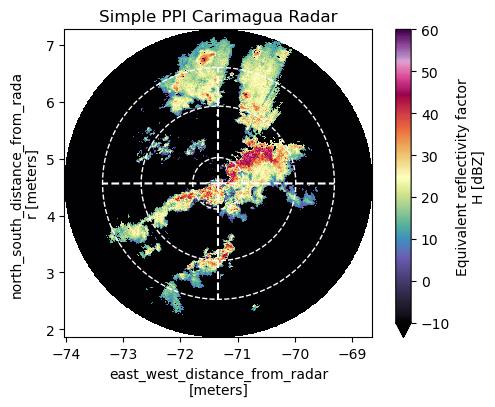

In [27]:
fig = plt.figure(figsize=(6, 4))
pm = swp.DBZH.wrl.vis.plot(ax=111, fig=fig, cmap='ChaseSpectral', vmin=-10, vmax=60)
txt = plt.title("Simple PPI Carimagua Radar")

ax = plt.gca()
wrl.vis.plot_ppi_crosshair(
    site=(swp.longitude.values, swp.latitude.values, swp.altitude.values),
    ranges=[50e3, 150e3, 225e3],
    angles=[0, 90, 180, 270],
    line=dict(color="white"),
    circle={"edgecolor": "white"},
    ax=ax,
    crs=epsg,
);

### 3.3 Mapa de ruido (Clutter)

Entre muchas otras herramientas y funcionalidades, `Wradlib` nos permite realizar un mapa de ruidos (clutter) usando el filtro desarrollado por [Gabella et al. (2002)](https://iris.polito.it/handle/11583/1411995)

Text(0.5, 1.0, 'Clutter Map')

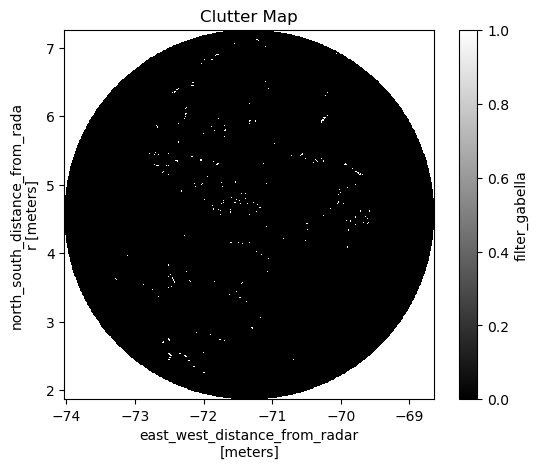

In [28]:
clutter = swp.DBZH.wrl.classify.filter_gabella(tr1=12, n_p=6, tr2=1.1)
pm = clutter.wrl.vis.plot(cmap=plt.cm.gray)
plt.title("Clutter Map")

`Wradlib` es de libreria que nos permite aplicar muchas otras tecnica de filtrado, visualización, estimación cuantitativa de la precipitación entre otros. Para mas información pueden consultar la [documentación oficial](https://docs.wradlib.org/en/latest/index.html)

---

## Conclusiones

En este cuadernillo aprendimos sobre algunas librerias que nos permiten leer y generar productos basados en datos de radares meteorológicos. 

## Fuentes y referencias

* Helmus, J.J. & Collis, S.M., (2016). The Python ARM Radar Toolkit (Py-ART), a Library for Working with Weather Radar Data in the Python Programming Language. Journal of Open Research Software. 4(1), p.e25. DOI: http://doi.org/10.5334/jors.119
* Radar Cookbook [https://projectpythia.org/radar-cookbook/README.html] DOI[https://doi.org/10.5281/zenodo.8075855]
* Rose, B. E. J., Kent, J., Tyle, K., Clyne, J., Banihirwe, A., Camron, D., May, R., Grover, M., Ford, R. R., Paul, K., Morley, J., Eroglu, O., Kailyn, L., & Zacharias, A. (2023). Pythia Foundations (Version v2023.05.01) https://doi.org/10.5281/zenodo.7884572